In [1]:
from glob import glob
import numpy as np
import os
from PIL import Image, ImageOps
data_dir = '../data'

In [2]:
labels = os.listdir(data_dir)
print(labels)

['axes', 'boots', 'carabiners', 'crampons', 'gloves', 'hardshell_jackets', 'harnesses', 'helmets', 'insulated_jackets', 'pulleys', 'rope', 'tents']


In [3]:
#configuration
img_width, img_height = 128, 128
batch_size=16

In [4]:
X, y = [], []
max_cnt = 100
for label in labels:
    files = (os.listdir(os.path.join(data_dir,label)))
    cnt = 0
    for file in files:
        cnt+=1
        img = Image.open(os.path.join(data_dir, label,file)).convert('L')
        width, height = img.size
        if height> width:
            ratio = float(img_height/height)
        else:
            ratio = float(img_width/width)
        new_size = int(width*ratio), int(height*ratio)
        img = img.resize(new_size, Image.ANTIALIAS)
        delta_w = img_width - img.size[0]
        delta_h = img_height - img.size[1]
        padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
        img = ImageOps.expand(img, padding, fill='white')
        img = ImageOps.equalize(img)
        data = np.asarray(img)
        X.append(data)
        y.append(labels.index(label))
        if cnt > max_cnt:
            break

PAAAAALKBOLDLPOPx1013041_zm.jpeg


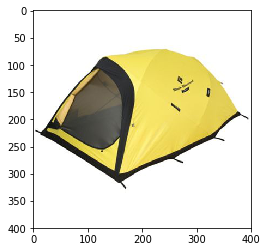

In [5]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
print(file)
img = Image.open(os.path.join(data_dir, label,file)).convert('RGB')

imshow(np.asarray(img))

PAAAAALKBOLDLPOPx1013041_zm.jpeg


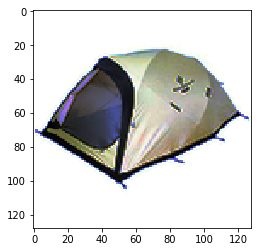

In [38]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
print(file)
img = Image.open(os.path.join(data_dir, label,file)).convert('RGB')
width, height = img.size
if height> width:
    ratio = float(img_height/height)
else:
    ratio = float(img_width/width)
new_size = int(width*ratio), int(height*ratio)
img = img.resize(new_size, Image.ANTIALIAS)
delta_w = img_width - img.size[0]
delta_h = img_height - img.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
img = ImageOps.expand(img, padding, fill='white')
img_eq = ImageOps.equalize(img)
imshow(np.asarray(img_eq))  
    

(array([  2.,   1.,   3.,   3.,   6.,   1.,   3.,   8.,   7.,   9.,  10.,
         15.,  11.,  21.,  19.,  16.,  23.,  36.,  18.,  36.,  42.,  41.,
         40.,  44.,  31.,  49.,  56.,  39.,  39.,  52.,  51.,  52.,  41.,
         41.,  56.,  58.,  63.,  46.,  57.,  55.,  70.,  63.,  72.,  69.,
         79.,  81.,  92.,  99., 111., 151., 132., 115.,  99., 103.,  77.,
         76.,  74.,  66.,  76.,  84.,  77.,  59.,  80.,  78.,  85.,  82.,
         85.,  84.,  91.,  85.,  77.,  81.,  86.,  87., 109.,  84.,  92.,
        120., 107.,  96., 112., 157., 149., 175., 192., 193., 184., 166.,
        195., 170., 171., 162., 183., 174., 170., 201., 198., 201., 173.,
        136., 121., 132., 158., 200., 112.,  98.,  82.,  92.,  68.,  76.,
         78.,  55.,  56.,  39.,  35.,  30.,  39.,  45.,  22.,  29.,  26.,
         19.,  11.,  12.,  16.,  12.,  21.,  15.,  13.,  12.,  11.,  15.,
         12.,  18.,   5.,  11.,   9.,  10.,   6.,   9.,  13.,  18.,  11.,
          8.,   7.,  11.,  11.,  12., 

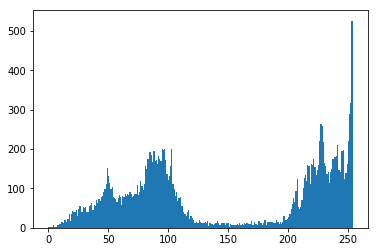

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
values = np.ndarray.flatten(np.asarray(img))
values = values[np.where(values != 255)]
plt.hist(values,bins=255)

(array([ 45.,  77.,  74.,  84.,  77.,  66.,  78.,  68.,  65.,  81.,  72.,
         75.,  73.,  57.,  84.,  85.,  75.,  74.,  94.,  70.,  54.,  53.,
        114., 104.,  20., 128.,  31., 118.,  33.,  72., 105.,  19.,  90.,
         76.,  73.,  76.,  62., 115.,  39., 108.,  49.,  80.,  54.,  89.,
         53.,  72.,  86.,  37.,  88.,  78.,  72.,  76.,  74.,  66.,  71.,
         76.,  88.,  52., 100.,  37.,  94.,  79.,  55.,  95.,  64.,  68.,
         76., 121.,   0., 111.,  68.,  95.,  63., 106.,  24., 122.,  42.,
         49., 134.,  55.,  30.,  97.,  48.,  99.,  66.,  33., 123.,  40.,
         48., 166.,  45.,  47.,  48., 159.,  50.,  42.,  51.,  47., 182.,
         48.,  43.,  55.,  44., 194.,  60.,  50.,  41.,  38.,  76., 196.,
         76.,  32., 110.,   0.,  61., 204.,  97.,   0.,  86.,   0., 108.,
        237.,   0.,   0.,   0.,  95., 193.,   0.,  35., 131.,   0.,  58.,
        126., 165.,   0.,   0.,  88., 212.,   0.,  91.,   0., 219.,   0.,
        100.,   0., 118., 104.,  81., 

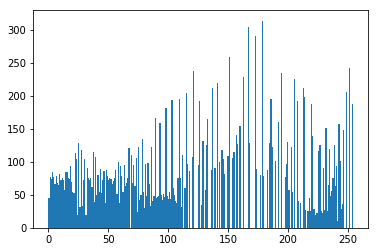

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
values = np.ndarray.flatten(np.asarray(img_eq))
values = values[np.where(values != 255)]
plt.hist(values,bins=255)

In [16]:
np.save(os.path.join(data_dir, 'X.npy'), X)
np.save(os.path.join(data_dir, 'y.npy'), y)

In [5]:
import random
c = list(zip(X, y))
random.shuffle(c)
X, y = zip(*c)
X = np.array(X)
y = np.array(y)

In [ ]:
from keras.utils import np_utils
y = np_utils.to_categorical(y) 

Using TensorFlow backend.


In [ ]:
X_flat = np.reshape(X, (X.shape[0], -1))
print(X_flat.shape)
print(128*128*3)

In [57]:
from collections import Counter
Counter(np.argmax(y, axis=1))

Counter({0: 79,
         1: 101,
         2: 101,
         3: 101,
         4: 101,
         5: 101,
         6: 101,
         7: 95,
         8: 101,
         9: 42,
         10: 101,
         11: 101})

In [58]:
from sklearn.neighbors import KNeighborsClassifier
split = 0.5
X_train_, X_val = X_flat[0:int(len(X_flat)*split)], X_flat[int(len(X_flat)*split):]
y_train_, y_val = y[0:int(len(y)*split)], y[int(len(y)*split):]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_, y_train_) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
neigh.score(X_val, y_val)

0.8827708703374778

In [38]:
y_pred = neigh.predict(X_val)

In [42]:
from sklearn.metrics import confusion_matrix
print(labels)
confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis =1))


['axes', 'boots', 'carabiners', 'crampons', 'gloves', 'hardshell_jackets', 'harnesses', 'helmets', 'insulated_jackets', 'pulleys', 'rope', 'tents']


array([[ 36,   0,   1,   0,   0,   0,   0,   0,   0,   0,   2,   1],
       [  1,  50,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0],
       [  6,   0, 126,   0,   0,   0,   1,   0,   0,   0,   0,   2],
       [  4,   0,   0,  42,   0,   0,   1,   0,   0,   0,   0,   8],
       [  3,   0,   1,   0,  93,   8,   0,   0,   2,   0,   6,   1],
       [  2,   0,   0,   0,   1, 218,   0,   0,  24,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,  77,   0,   0,   0,   0,   2],
       [  3,   1,   0,   0,   0,   0,   0,  44,   0,   0,   0,   3],
       [  0,   0,   1,   0,   0,  28,   1,   0,  90,   0,   0,   0],
       [  7,   1,   0,   0,   0,   3,   0,   0,   2,   8,   0,   0],
       [  3,   0,   1,   0,   0,   1,   0,   0,   0,   0,  88,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54]],
      dtype=int64)

In [22]:
img = Image.open('../ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpg').convert('RGB')
width, height = img.size
if height> width:
    ratio = float(img_height/height)
else:
    ratio = float(img_width/width)
new_size = int(width*ratio), int(height*ratio)
img = img.resize(new_size, Image.ANTIALIAS)
delta_w = img_width - img.size[0]
delta_h = img_height - img.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
img = ImageOps.expand(img, padding, fill='white')
img = ImageOps.equalize(img)
data = np.asarray(img)
print(labels[np.argmax(neigh.predict(data.reshape(1,-1)))])


helmets


In [9]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import random

# dimensions of our images.
num_classes=len(labels)
X_train = np.array(X)
y_train = np.array(y)
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 3)
input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(np.array(X_train)/255, np.array(y_train), validation_split=0.2, nb_epoch=10, batch_size=batch_size, verbose=1)

c:\users\lahulsta\appdata\local\continuum\anaconda3\envs\openhack\lib\site-packages\ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1697 samples, validate on 425 samples
Epoch 1/10
1697/1697 [==============================] - 23s 13ms/step - loss: 2.2447 - acc: 0.5380 - val_loss: 0.5056 - val_acc: 0.8329
Epoch 2/10
1697/1697 [==============================] - 17s 10ms/step - loss: 0.3635 - acc: 0.8933 - val_loss: 0.3473 - val_acc: 0.8941
Epoch 3/10
1697/1697 [==============================] - 17s 10ms/step - loss: 0.1346 - acc: 0.9558 - val_loss: 0.3070 - val_acc: 0.8988
Epoch 4/10
1697/1697 [==============================] - 17s 10ms/step - loss: 0.0901 - acc: 0.9705 - val_loss: 0.2796 - val_acc: 0.9341
Epoch 5/10
1697/1697 [==============================] - 16s 9ms/step - loss: 0.0473 - acc: 0.9835 - val_loss: 0.3381 - val_acc: 0.9365
Epoch 6/10
1697/1697 [==============================] - 17s 10ms/step - loss: 0.0342 - acc: 0.9918 - val_loss: 0.2876 - val_acc: 0.9294
Epoch 7/10
1697/1697 [==============================] - 16s 10ms/step - loss: 0.0237 - acc: 0.9941 - val_loss: 0.2926 - val_acc: 0.9365
Ep

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

split = 0.5
X_train_, X_val = X_train[0:int(len(X_train)*split)], X_train[int(len(X_train)*split):]
y_train_, y_val = y_train[0:int(len(y_train)*split)], y_train[int(len(y_train)*split):]

datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function = preprocess_input)

datagen_val = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function = preprocess_input)


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen_train.fit(X_train_)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen_val.fit(X_val)


# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen_train.flow(X_train_, y_train_, batch_size=batch_size), validation_data=datagen_val.flow(X_val, y_val, batch_size=batch_size),nb_epoch=100, verbose=1)

c:\users\lahulsta\appdata\local\continuum\anaconda3\envs\openhack\lib\site-packages\ipykernel_launcher.py:57: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
c:\users\lahulsta\appdata\local\continuum\anaconda3\envs\openhack\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=100, validation_data=<keras_pre..., verbose=1)`


Epoch 1/100
67/67 [==============================] - 20s 297ms/step - loss: 0.6732 - acc: 0.7963 - val_loss: 0.5912 - val_acc: 0.8473
Epoch 2/100
67/67 [==============================] - 19s 282ms/step - loss: 0.1948 - acc: 0.9456 - val_loss: 0.2448 - val_acc: 0.9387
Epoch 3/100
67/67 [==============================] - 19s 280ms/step - loss: 0.1873 - acc: 0.9476 - val_loss: 0.6395 - val_acc: 0.8784
Epoch 4/100
67/67 [==============================] - 19s 278ms/step - loss: 0.1451 - acc: 0.9541 - val_loss: 0.4133 - val_acc: 0.9123
Epoch 5/100
67/67 [==============================] - 18s 268ms/step - loss: 0.1774 - acc: 0.9504 - val_loss: 0.2128 - val_acc: 0.9519
Epoch 6/100
67/67 [==============================] - 18s 271ms/step - loss: 0.1130 - acc: 0.9683 - val_loss: 0.2918 - val_acc: 0.9303
Epoch 7/100
67/67 [==============================] - 18s 272ms/step - loss: 0.0941 - acc: 0.9719 - val_loss: 0.5512 - val_acc: 0.9067
Epoch 8/100
67/67 [==============================] - 18s 274ms

Epoch 62/100
67/67 [==============================] - 18s 271ms/step - loss: 0.0556 - acc: 0.9897 - val_loss: 0.1916 - val_acc: 0.9717
Epoch 63/100
67/67 [==============================] - 20s 293ms/step - loss: 0.0524 - acc: 0.9821 - val_loss: 0.5133 - val_acc: 0.9444
Epoch 64/100
67/67 [==============================] - 18s 263ms/step - loss: 0.0344 - acc: 0.9888 - val_loss: 0.2167 - val_acc: 0.9651
Epoch 65/100
67/67 [==============================] - 18s 273ms/step - loss: 0.0281 - acc: 0.9907 - val_loss: 0.2200 - val_acc: 0.9698
Epoch 66/100
67/67 [==============================] - 18s 275ms/step - loss: 0.0363 - acc: 0.9868 - val_loss: 0.5142 - val_acc: 0.9453
Epoch 67/100
67/67 [==============================] - 18s 263ms/step - loss: 0.0645 - acc: 0.9858 - val_loss: 0.1437 - val_acc: 0.9821
Epoch 68/100
67/67 [==============================] - 18s 267ms/step - loss: 0.0284 - acc: 0.9916 - val_loss: 0.1902 - val_acc: 0.9623
Epoch 69/100
67/67 [==============================] - 1